# Exploring Gazetteers of Scotland (Individual DataFrames)

This notebook explores the structured data extracted from the **1842 edition** of the *Topographical, Statistical, and Historical Gazetteer of Scotland*. It is designed to be flexible: you can use it to explore **any of the available Gazetteer DataFrames**, simply by downloading and loading a different file from the list below.

## 📂 Available Gazetteer DataFrames (1803–1901)

- [dataframe_gaz_1803](https://drive.google.com/file/d/1a4BtLrwyfHb4I6cmAVbaaw-IafWf1dnR/view?usp=share_link)  
- [dataframe_gaz_1806](https://drive.google.com/file/d/1ZGt8hKzQ2rvk_-dlVHpn6UwoSkiZyNDO/view?usp=share_link)  
- [dataframe_gaz_1825](https://drive.google.com/file/d/1Fsr61JqpV4JND0VKtezbNoVCrdw_Ahi4/view?usp=share_link)  
- [dataframe_gaz_1838](https://drive.google.com/file/d/1g5xCuG_eAJp0GQNfDDTpwSK4ndqTz-G_/view?usp=share_link)  
- [dataframe_gaz_1842](https://drive.google.com/file/d/1dNJaS9RWHOvP3vsfy5ZDE6SCiVeSiRj_/view?usp=share_link)  
- [dataframe_gaz_1846](https://drive.google.com/file/d/1JxGybA-op04Xvs6-MG-C6x1iuneLF5qQ/view?usp=share_link)  
- [dataframe_gaz_1868](https://drive.google.com/file/d/1thPWG2LXHvo7owEWOzu_K_B5XZ5znPMO/view?usp=share_link)  
- [dataframe_gaz_1882](https://drive.google.com/file/d/1r5DMWfOas_ajS71vrC0Cr4I3oxD6ZLjm/view?usp=share_link)  
- [dataframe_gaz_1884](https://drive.google.com/file/d/1EHrlwH5cnZb1QISt_98ZcEpIVP3wIHmt/view?usp=share_link)  
- [dataframe_gaz_1901](https://drive.google.com/file/d/1a3Qi0Oj8HzFql0BkPjutaUQx8fSzqy1C/view?usp=share_link)  

These DataFrames were generated using the full extraction, cleaning, and semantic segmentation pipeline from the [MappingChange project](https://github.com/francesNLP/MappingChange).

---

### Notebook Focus

This notebook currently uses the 1842 edition as a case study. It supports:

- Inspecting article-level entries and their textual content  
- Validating segmentation quality and article boundaries  
- Exploring metadata fields such as page ranges, record titles, and inferred place types  
- Preparing the data for integration into the **temporal and semantic knowledge base** of Scottish place descriptions across the 19th century.


---



### Clarification of Dataset

We have 21 volumes from 1803 to 1901.

* 1803: Gazetteer of Scotland -- 1 volume
* 1806: Gazetteer of Scotland: containing a particular and concise description of the counties, parishes, islands, cities with maps -- 1 volume
*1825: Gazetteer of Scotland: arranged under the various descriptions of counties, parishes, islands -- 1 volume
* 1828: Descriptive account of the princi- pal towns in Scotland to accompany Woods town atlas -- 1 volume
* 1838: Gazetteer of Scotland with plates and maps -- 2 volumes
* 1842: Topographical, statistical, and historical gazetteer of Scotland  -- 2 volumes
* 1846: Topographical dictionary of Scotland  -- 2 volumes
* 1848: Topographical, statistical, and historical gazetteer of Scotland  -- 1 volume
* 1868: Imperial gazetteer of Scotland; or Dictionary of Scottish topography, compiled from the most recent au- thorities, and forming a complete body of Scottish geography, physical, statistical, and historical -- 2 volumes
* 1882: Gazetteer of Scotland -- 1 volume
* 1883: Ordnance gazetteer of Scotland -- 6 volumes
* 1901: Ordnance gazetteer of Scotland -- 1 volume


---


## Import libraries

In [ ]:
import pandas as pd
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import json


## Load the dataframe

In [ ]:
g_df= pd.read_json('gaz_dataframe_1842', orient="index")

In [ ]:
# Show the row(s) where the name is exactly 'ST ANDREWS'
g_df[g_df['name'] == 'ST ANDREWS']

,MMSID,edition,editor,editor_date,genre,language,metsXML,termsOfAddress,numberOfPages,numberOfWords,...,numberOfVolumes,volumeNum,name,starts_at_page,ends_at_page,total_articles_page,text,total_articles,reference_terms,alter_names
105,9931344933804340,"1842, Volume 1","Scotland. [Appendix. - Descriptions, Topograph...",NaN,NaN,eng,97437554-mets.xml,NaN,920,5,...,2,1,ST ANDREWS,113,122,1,embouchure of the Eden—up which the tide flows...,1739,[],[]
1180,9931344933804340,"1842, Volume 1","Scotland. [Appendix. - Descriptions, Topograph...",NaN,NaN,eng,97437554-mets.xml,NaN,920,5,...,2,1,ST ANDREWS,467,467,1,This parish is partly landward but chiefly tow...,1739,[],[]
1404,9931344933804340,"1842, Volume 1","Scotland. [Appendix. - Descriptions, Topograph...",NaN,NaN,eng,97437554-mets.xml,NaN,920,5,...,2,1,ST ANDREWS,638,638,1,The city of St. Andrews was deserted by its in...,1739,[],[]


In [ ]:
g_df.iloc[108]

,108
MMSID,9931344933804340
edition,"1842, Volume 1"
editor,"Scotland. [Appendix. - Descriptions, Topograph..."
editor_date,NaN
genre,NaN
language,eng
metsXML,97437554-mets.xml
termsOfAddress,NaN
numberOfPages,920
numberOfWords,5


## Dataframe Columns

In [ ]:
g_df.head()

,MMSID,edition,editor,editor_date,genre,language,metsXML,termsOfAddress,numberOfPages,numberOfWords,...,numberOfVolumes,volumeNum,name,starts_at_page,ends_at_page,total_articles_page,text,total_articles,reference_terms,alter_names
0,9931344933804340,"1842, Volume 1","Scotland. [Appendix. - Descriptions, Topograph...",NaN,NaN,eng,97437554-mets.xml,NaN,920,5,...,2,1,ABBEY,79,79,29,a name frequently given in Scottish topography...,1739,[],[]
1,9931344933804340,"1842, Volume 1","Scotland. [Appendix. - Descriptions, Topograph...",NaN,NaN,eng,97437554-mets.xml,NaN,920,5,...,2,1,ABBEY PARISH,79,79,29,See Paisley.,1739,[Paisley],[]
2,9931344933804340,"1842, Volume 1","Scotland. [Appendix. - Descriptions, Topograph...",NaN,NaN,eng,97437554-mets.xml,NaN,920,5,...,2,1,ABBEY ST BATHANS,79,79,29,a parish in the northern part of Berwickshire ...,1739,[],[]
3,9931344933804340,"1842, Volume 1","Scotland. [Appendix. - Descriptions, Topograph...",NaN,NaN,eng,97437554-mets.xml,NaN,920,5,...,2,1,ABBEYCRAIG,79,79,29,"a hill in the parish of Logie, in the vicinity...",1739,[],[]
4,9931344933804340,"1842, Volume 1","Scotland. [Appendix. - Descriptions, Topograph...",NaN,NaN,eng,97437554-mets.xml,NaN,920,5,...,2,1,ABBEYGREEN,79,79,29,See Lesmahago.,1739,[Lesmahago],[]


### Fields in the Dataset


Key metadata fields include:

* General Metadata
  * MMSID: Metadata Management System ID
  *
  : Unique identifier for newspaper issues
  * edition: Date of publication
  * editor: Name of the editor
  * genre: Genre of the issue
  * language: Language used
  * place: Place of publication
  * publisher: Organization/person publishing the issue
  * shelfLocator: Shelf locator for physical archives

* Content Metadata
 * numberOfPages: Total pages in an volume
 * numberOfWords: Total word count per volume
 * text: Full text of each article
 * starts_at_page: Page number of which an article starts
 * ends_at_page: Page number of which an article finishes
 * total_articles_page: Total articles per page
 * total_articles: Total articles per volume

* Digital Metadata
 * metsXML: XML file metadata for each volume
 * altoXML: XML files for each article of an volume
 * permanentURL: Persistent URL to access the volume online

* Series Metadata
 * serieTitle: Title of the series (e.g., 1803: Gazetteer of Scotland - )
 * serieSubTitle: Subtitle for the series
 * numberOfVolumes: Total volumes with the same title

We can use **metsXML** or **volumedID** to identify each article page.

### Exploring the 1st Page of the 1st Volume issued 1838

In [ ]:
# Metadata + text of the first article (starts_at_page 53 ) of the first (and only) volume (97414570)
g_df.loc[0]

,0
MMSID,9931344933804340
edition,"1842, Volume 1"
editor,"Scotland. [Appendix. - Descriptions, Topograph..."
editor_date,NaN
genre,NaN
language,eng
metsXML,97437554-mets.xml
termsOfAddress,NaN
numberOfPages,920
numberOfWords,5


### Titles Over Time

In [ ]:
g_df['volumeTitle'].unique()

array(['topographical, statistical, and historical gazetteer of Scotland 1842, Volume 1',
       'topographical, statistical, and historical gazetteer of Scotland 1842, Volume 2'],
      dtype=object)

### Data Exploration


In [ ]:
g_df['edition'].unique()

array(['1842, Volume 1', '1842, Volume 2'], dtype=object)

In [ ]:
g_df['year'].unique()

array([1842])

In [ ]:
g_df['edition'].unique()

array(['1842, Volume 1', '1842, Volume 2'], dtype=object)

In [ ]:
print(g_df.columns)  # See all available columns
print(g_df.info())  # Check data types and missing values


Index(['MMSID', 'edition', 'editor', 'editor_date', 'genre', 'language',
       'metsXML', 'termsOfAddress', 'numberOfPages', 'numberOfWords',
       'permanentURL', 'physicalDescription', 'place', 'publisher',
       'referencedBy', 'shelfLocator', 'altoXML', 'serieSubTitle',
       'volumeTitle', 'volumeId', 'year', 'serieNum', 'part', 'collectionName',
       'serieTitle', 'publisherPersons', 'numberOfVolumes', 'volumeNum',
       'name', 'starts_at_page', 'ends_at_page', 'total_articles_page', 'text',
       'total_articles', 'reference_terms', 'alter_names'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 2938 entries, 0 to 2937
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MMSID                2938 non-null   int64  
 1   edition              2938 non-null   object 
 2   editor               2938 non-null   object 
 3   editor_date          0 non-null      float64
 4   

In [ ]:
print(g_df['year'].unique())  # View unique publication years
print(g_df['year'].value_counts())  # See how many entries per year


[1842]
year
1842    2938
Name: count, dtype: int64


In [ ]:
g_df['MMSID'].unique()

array([9931344933804340])

In [ ]:
g_df['volumeId'].unique()

array([97437554, 97493971])

In [ ]:
from os import name
name_articles=g_df['name'].unique()
for i in name_articles:
  print(i)

ABBEY
ABBEY PARISH
ABBEY ST BATHANS
ABBEYCRAIG
ABBEYGREEN
ABBOTSRULE
ABBOTSFORD
ABBOTSHALL
ABBS HEAD ST
ABDIE
ABERBROTHWICK
ABERCORN
ABERCROMBIE OR ST MONANCE
ABERDALGIE
ABERDEEN
OLD ABERDON
OLD ABERDEEN
NEW ABERDEEN
ABERDEENSHIRE
ABERDOUR
ABERFELDIE
ABERFOYLE
ABERLADY
ABERLEMNO
ABERLOUR
ABERLUTHNET
ABERNETHY
ABERNYTE
ABERRUTHVEN
ABERTARFF
ABINGTON
ABOYNE
ACHAISTAL
ACHANDUIM
ACHINDAVY OR AUCHENDAVIE
ACHNACRAIG OR AUCHNACRAIG
AE THE OR WATER OF AE
ACHESONS HAVEN
ACHILTY LOCH
ACHINDAVY
ACHNACRAIG
ACHRAY LOCH
ADD THE
ADVIE
AE THE
ASTON
AIGASH
AILSA CRAIG
AIRD
AIRD CASTLE OF
AIRD THE
AIRD OR AIRD SF THE
AIGASH OR EALANAIGAS
AIRDNAMURCHAN
AIRD POINT
AIRDLE THE
AIRDRIE
AIRDS MOSS
AIRLIE
AIRTHRIE
AITHSTING
ALBANY ALBION OR ALBINN
ALBION PARISH
ALDCLUYD
ALD CAMUS OR OLD CAHBUS
ALDCATHIE OR ALCATHT
ALDHAM
ALDIE
ALE THE
ALEMOOR LOCH
ALEXANDRIA
ALBANY
ALFORD
ALLANTON
ALLEN THE
ALINE LOCH
ALLAN THE
ALLAN BRIDGE OF
ALLOA
ALLOWAY
ALMOND THE
ALNESS
ALSH LOCH
ALTAVIG OR ALTBHEIG
ALTMORE THE
ALTYRE
ALV

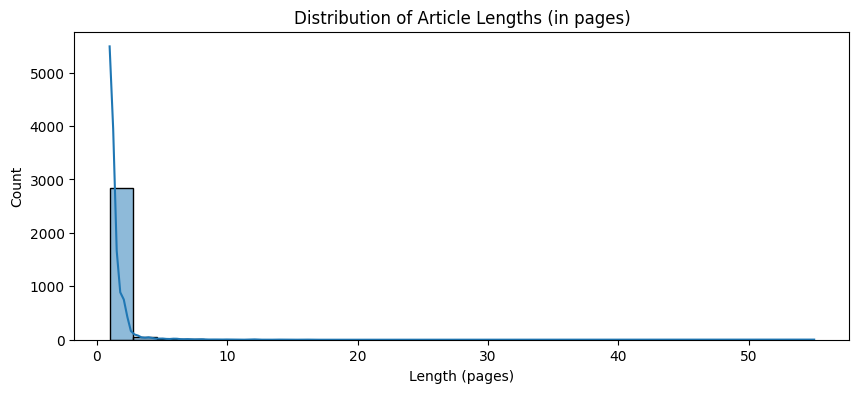

In [ ]:
g_df["article_length_pages"] = g_df["ends_at_page"] - g_df["starts_at_page"] + 1
plt.figure(figsize=(10, 4))
sns.histplot(g_df["article_length_pages"], bins=30, kde=True)
plt.title("Distribution of Article Lengths (in pages)")
plt.xlabel("Length (pages)")
plt.ylabel("Count")
plt.show()


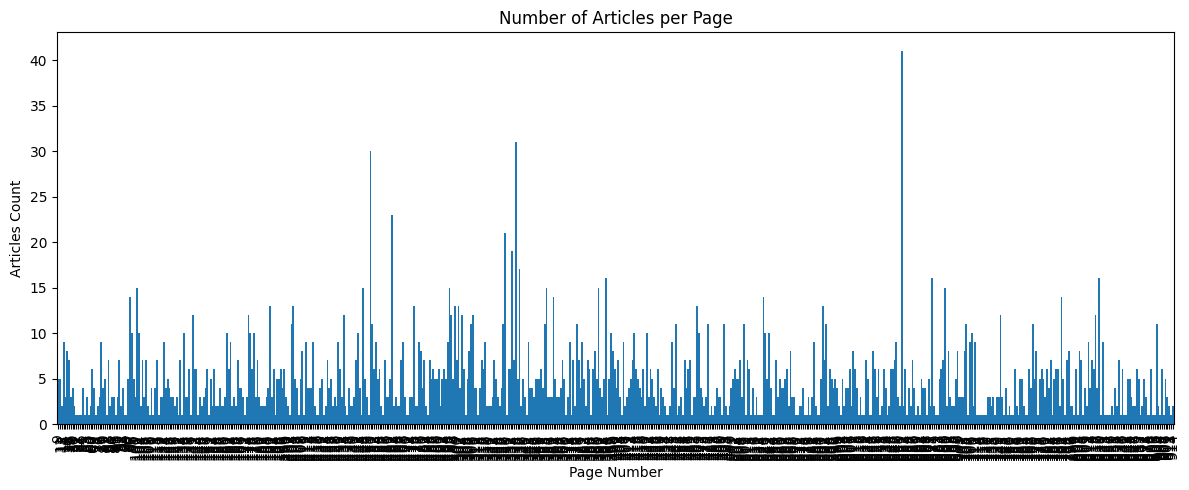

In [ ]:
articles_per_page = g_df.groupby("starts_at_page")["name"].count()
plt.figure(figsize=(12, 5))
articles_per_page.plot(kind="bar", width=1)
plt.title("Number of Articles per Page")
plt.xlabel("Page Number")
plt.ylabel("Articles Count")
plt.tight_layout()
plt.show()


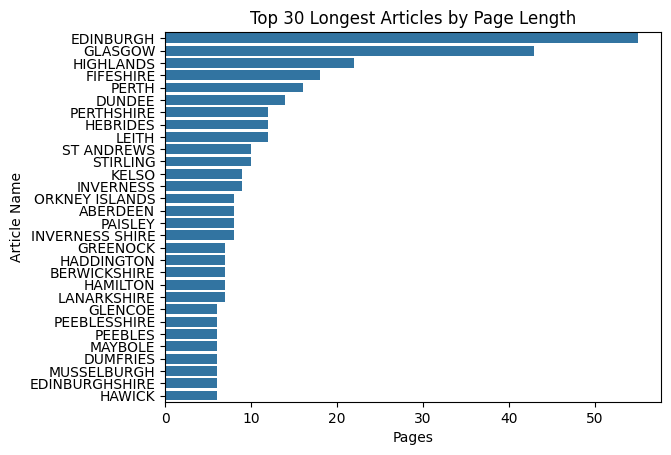

In [ ]:
longest = g_df.sort_values("article_length_pages", ascending=False)[["name", "article_length_pages"]].head(30)
sns.barplot(x="article_length_pages", y="name", data=longest)
plt.title("Top 30 Longest Articles by Page Length")
plt.xlabel("Pages")
plt.ylabel("Article Name")
plt.show()


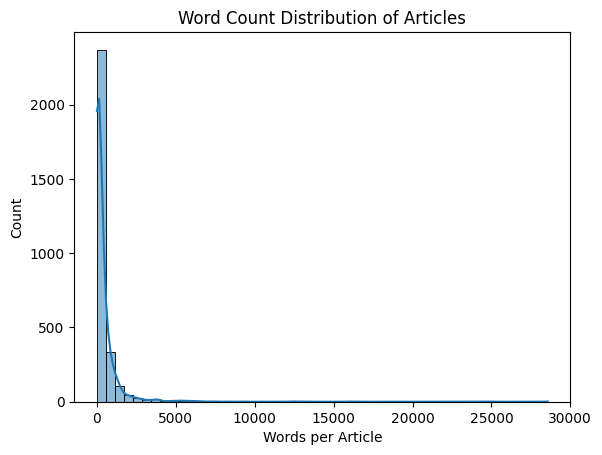

In [ ]:
g_df["word_count"] = g_df["text"].apply(lambda x: len(x.split()))
sns.histplot(g_df["word_count"], bins=50, kde=True)
plt.title("Word Count Distribution of Articles")
plt.xlabel("Words per Article")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


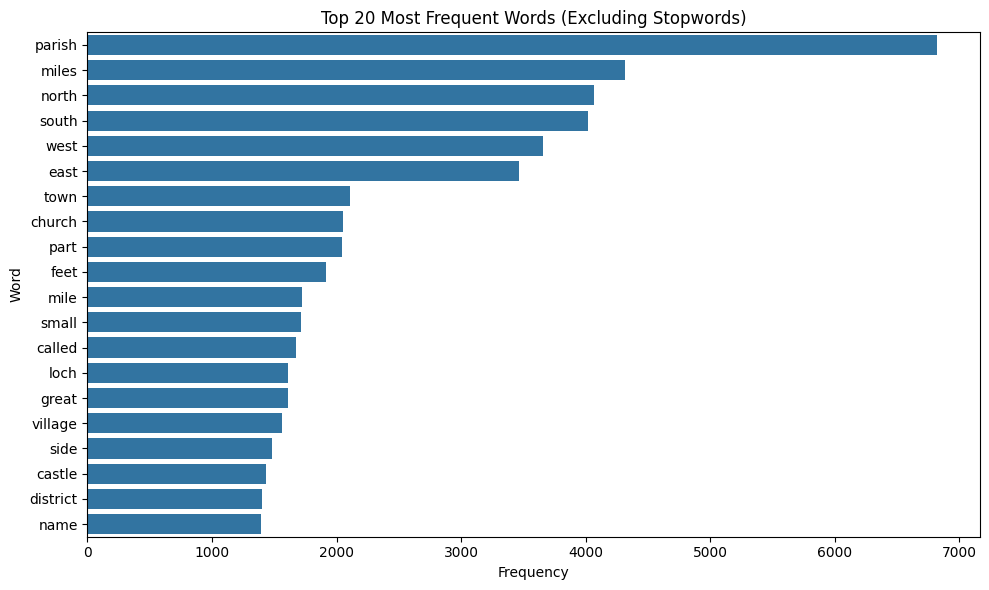

In [ ]:
from collections import Counter
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Only needed once (download stopwords)
nltk.download('stopwords')

# Prepare stopwords list
stop_words = set(stopwords.words('english'))

# Combine all text and clean
all_words = " ".join(g_df["text"]).lower()
words = re.findall(r'\b[a-z]{4,}\b', all_words)  # filter words 4+ letters

# Remove stopwords
filtered_words = [word for word in words if word not in stop_words]

# Count and plot
common_words = Counter(filtered_words).most_common(20)
words_df = pd.DataFrame(common_words, columns=["word", "count"])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="count", y="word", data=words_df)
plt.title("Top 20 Most Frequent Words (Excluding Stopwords)")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()


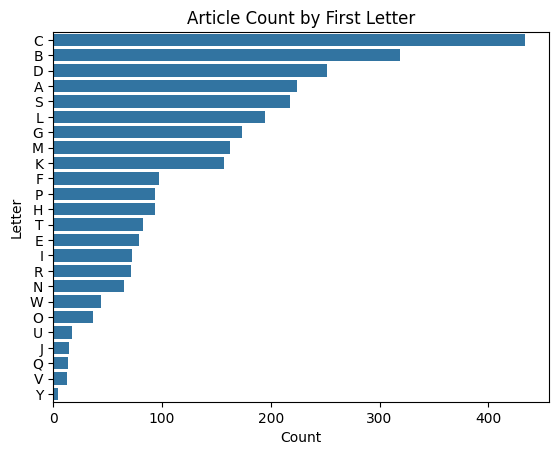

In [ ]:
g_df["first_letter"] = g_df["name"].str[0]
sns.countplot(y="first_letter", data=g_df, order=g_df["first_letter"].value_counts().index)
plt.title("Article Count by First Letter")
plt.xlabel("Count")
plt.ylabel("Letter")
plt.show()



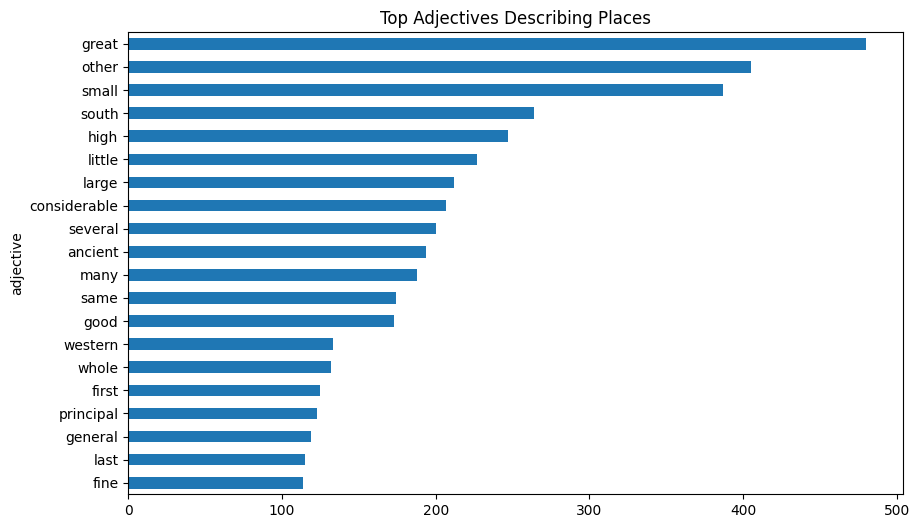

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

# Increase the max_length limit
nlp.max_length = 2000000  # or any value large enough for your text

all_text = " ".join(g_df["text"][:500])  # limit for speed
doc = nlp(all_text)
adjectives = [token.lemma_ for token in doc if token.pos_ == "ADJ" and len(token) > 3]
adj_counts = Counter(adjectives).most_common(20)
pd.DataFrame(adj_counts, columns=["adjective", "count"]).plot.barh(x="adjective", y="count", figsize=(10,6), legend=False)
plt.title("Top Adjectives Describing Places")
plt.gca().invert_yaxis()
plt.show()



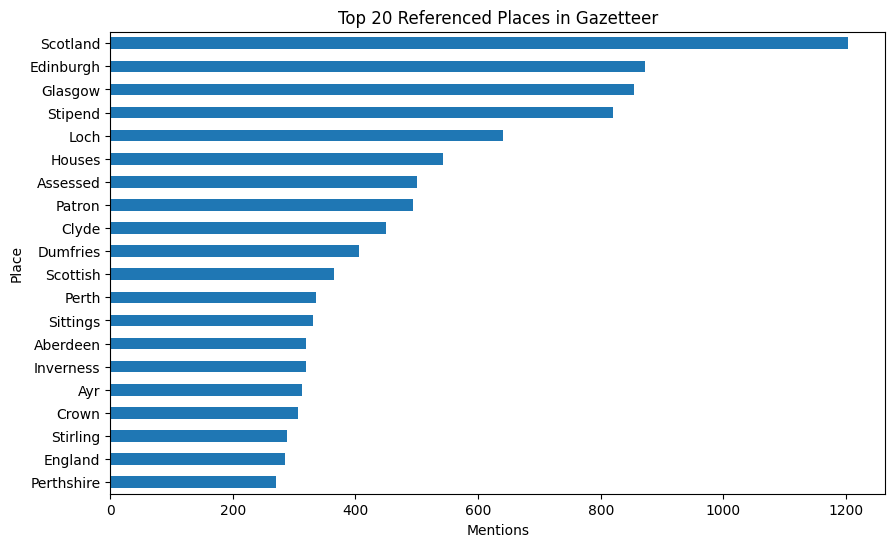

In [ ]:
from nltk.corpus import stopwords
from collections import Counter
import re

# Load stopwords and title terms
stop_words = set(word.capitalize() for word in stopwords.words('english'))
title_terms = {
    "Mr", "Mrs", "Miss", "Ms", "Earl", "Lord", "Lady", "Sir", "Duke", "Baron",
    "Count", "Rev", "St", "Saint", "King", "Queen", "Dr", "Captain", "Major",
    "General", "Colonel", "Dean", "Professor", "Archbishop"
}
custom_exclude = {"Volume", "Gazetteer", "Map", "County", "Parish", "Description", "Edition", "Near", "Population", "Besides", "Esq", "Scots", "Roman", "English", "Frith", "Forth", "James"}

# Extract capitalized words/phrases
place_candidates = re.findall(r'\b[A-Z][a-z]+(?:\s[A-Z][a-z]+)*\b', " ".join(g_df["text"]))

# Filter out stopwords, titles, and generic terms
filtered_places = [
    place for place in place_candidates
    if all(word not in stop_words and word not in title_terms and word not in custom_exclude
           for word in place.split())
]

# Get most common
top_places = Counter(filtered_places).most_common(20)

# Plotting
pd.DataFrame(top_places, columns=["Place", "Mentions"]).plot.barh(
    x="Place", y="Mentions", figsize=(10, 6), legend=False)
plt.title("Top 20 Referenced Places in Gazetteer")
plt.xlabel("Mentions")
plt.gca().invert_yaxis()
plt.show()



In [ ]:
num_repeated = (g_df['name'].value_counts() > 1).sum()
print(num_repeated)

83


In [ ]:
repeated_df = g_df[g_df['name'].duplicated(keep=False)]
print(repeated_df['name'])

19         ABERDOUR
20         ABERDOUR
21         ABERDOUR
22         ABERDOUR
23         ABERDOUR
           ...     
2845     TULLIEBOLE
2890    WALLACETOWN
2893      WALLYFORD
2894      WALLYFORD
2917       GALLOWAY
Name: name, Length: 183, dtype: object


In [ ]:
def print_repeated_articles(df):
    grouped = df.groupby(['edition', 'volumeId', 'name'])
    repeated = grouped.filter(lambda g: len(g) > 1)

    if repeated.empty:
        print("✅ No repeated place names found.")
        return

    print(f"\n🔁 Repeated articles found: {repeated['name'].nunique()} unique repeated names\n")

    for (edition, volumeId, name), group in repeated.groupby(['edition', 'volumeId', 'name']):
        print(f"\n📍 Name: {name} | Edition: {edition} | Volume: {volumeId} | Entries: {len(group)}\n")

        for idx, row in group.iterrows():
            print(f"🔹 Index: {idx} | Pages: {row['starts_at_page']}–{row['ends_at_page']}")
            print(f"Text (first 300 chars): {row['text'][:300]}...\n{'-'*60}")

In [ ]:
print_repeated_articles(g_df)


🔁 Repeated articles found: 67 unique repeated names


📍 Name: ABERDOUR | Edition: 1842, Volume 1 | Volume: 97437554 | Entries: 5

🔹 Index: 19 | Pages: 90–90
Text (first 300 chars): a parish in the north of Aberdeenshire ; bounded on the north by the German ocean, or Moray frith, along which it extends about 6| miles ; on the east by the parishes of Pitsligo and Tyrie ; on the south by Tyrie, New-Deer, and King Edward parishes ; and on the west by the latter parish, and that of...
------------------------------------------------------------
🔹 Index: 20 | Pages: 90–90
Text (first 300 chars): In 1831, there were about 1,600 hands employed in the linen, woollen, and cloth manufactures, in Old and New Aberdeen, and about 700 in other districts of the county. Aberdeenshire contains three royal boroughs, viz. Aberdeen, Kintore, and Inverury ; and several handsome towns, as Peterhead, Fraserb...
------------------------------------------------------------
🔹 Index: 21 | Pages: 90–91
Text (firs

In [ ]:
from collections import Counter

# Get only non-empty reference lists and flatten them
all_references = g_df['reference_terms'].apply(lambda x: x if isinstance(x, list) and x else None).dropna().explode()

reference_counter = Counter(all_references)

# Show top 10 most frequently referenced places
print("🔥 Top 10 most frequently referenced places:")
for name, count in reference_counter.most_common(10):
    print(f"- {name}: {count} times")


🔥 Top 10 most frequently referenced places:
- Glasgow: 12 times
- Arran: 4 times
- Braemar: 4 times
- Durness: 4 times
- Falkland: 4 times
- Dundee: 4 times
- Arbroath: 3 times
- Boleskine: 3 times
- Cockburnspath: 3 times
- Auchindoir: 3 times


In [ ]:
non_empty_alts = g_df['alter_names'].apply(lambda x: isinstance(x, list) and len(x) > 0)
print(f"✅ Articles with alternative names: {non_empty_alts.sum()} out of {len(g_df)} ({100 * non_empty_alts.mean():.2f}%)")


✅ Articles with alternative names: 114 out of 2938 (3.88%)


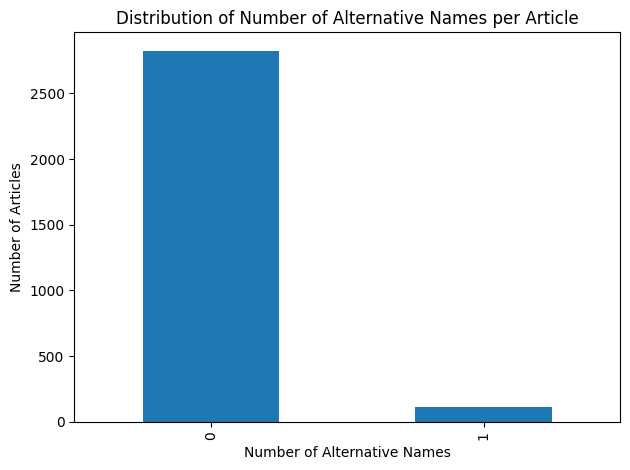

In [ ]:
import matplotlib.pyplot as plt

# Count number of alter names for each article
g_df['num_alternatives'] = g_df['alter_names'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Plot distribution
g_df['num_alternatives'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Number of Alternative Names per Article")
plt.xlabel("Number of Alternative Names")
plt.ylabel("Number of Articles")
plt.tight_layout()
plt.show()


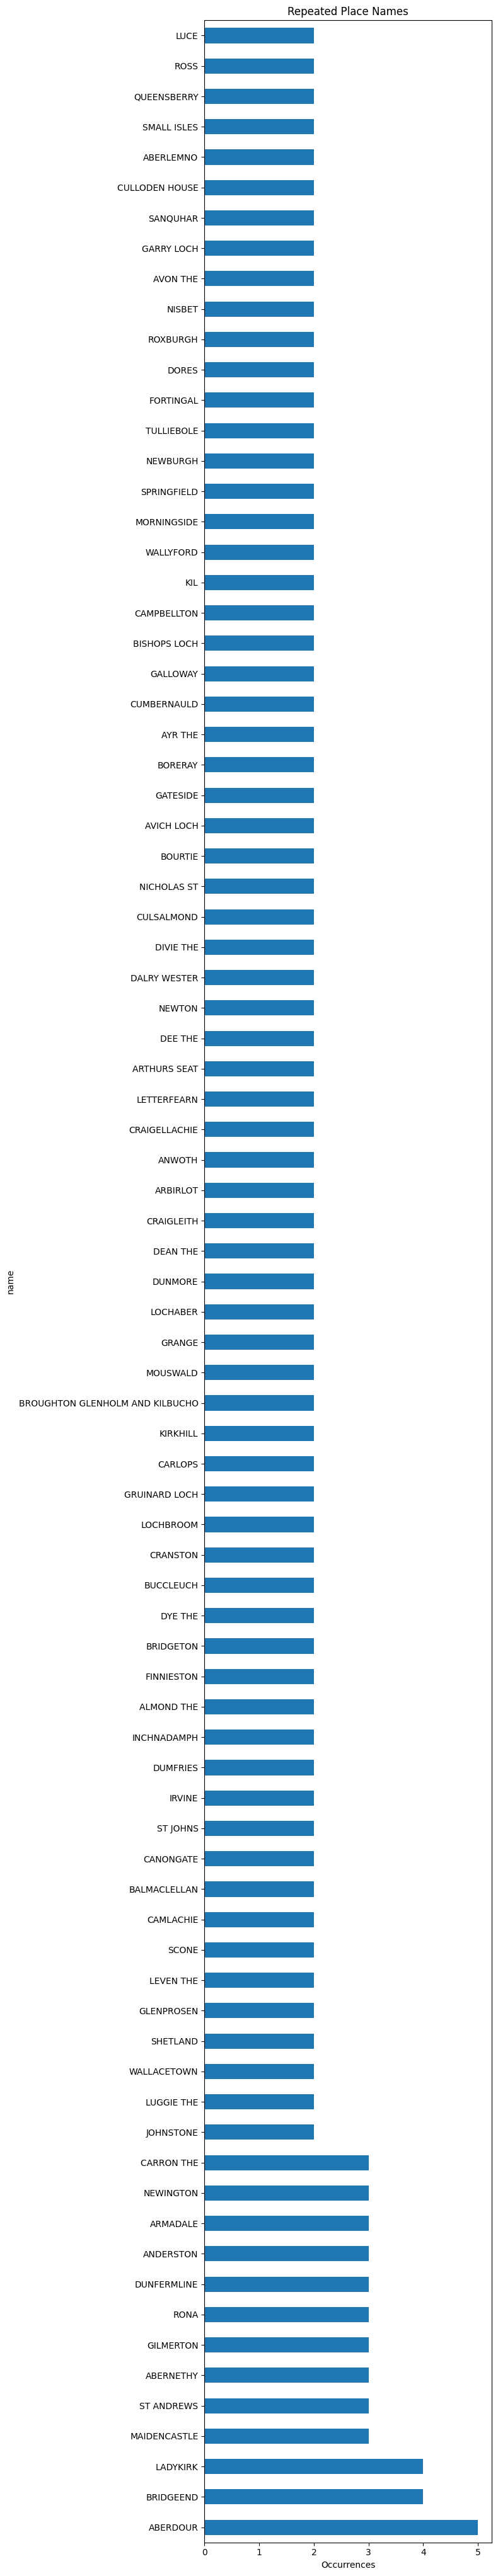

In [ ]:
repeated_names = g_df['name'].value_counts()
repeats = repeated_names[repeated_names > 1]

repeats.plot(kind="barh", figsize=(8, len(repeats)//2))
plt.title("Repeated Place Names")
plt.xlabel("Occurrences")
plt.tight_layout()
plt.show()


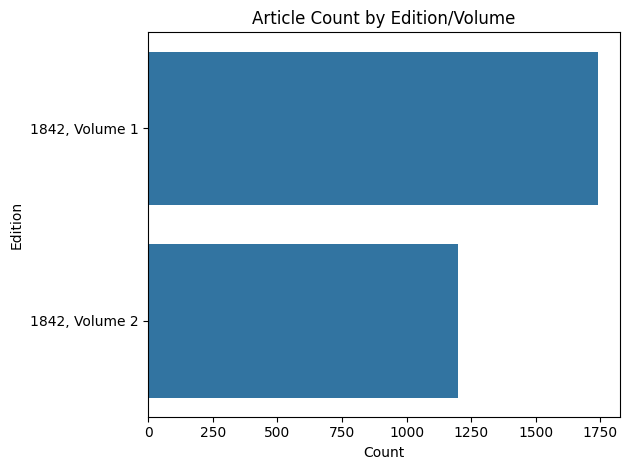

In [ ]:
sns.countplot(y="edition", data=g_df, order=g_df["edition"].value_counts().index)
plt.title("Article Count by Edition/Volume")
plt.xlabel("Count")
plt.ylabel("Edition")
plt.tight_layout()
plt.show()
